## 机器学习：将数据导入并分成测试集与训练集

In [1]:
from pyspark.ml.feature import VectorAssembler
df=spark.sql("select * from user_erin.creditcard")
df_assembler = VectorAssembler(inputCols=['time','V1','V2','V3','V4','V5','V6','V7','V8','V9'
                                          ,'V10','V11','V12','V13','V14'
                                         ,'V15','V16','V17','V18','V19','V20'
                                         ,'V21','V22','V23','V24','V25','V26','V27','V28','amount'],outputCol='features')
df= df_assembler.transform(df)
(train, test) = df.randomSplit([0.8, 0.2],seed = 11)

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,None,pyspark,idle,Link,,erin,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 机器学习：主成分分析
- 对于一组不同维度之间可能存在线性相关关系的数据，PCA能够把这组数据通过正交变换变成各个维度之间线性无关的数据，经过PCA处理的数据中的各个样本之间的关系往往更直观，所以它是一种非常常用的数据分析和预处理工具。PCA处理之后的数据各个维度之间是线性无关的，通过剔除方差较小的那些维度上的数据，我们可以达到数据降维的目的。
- 在定义PCA中，将想转化的特征长度赋予k，以下这个单元格，特征长度定为3。

In [2]:
from pyspark.ml.feature import PCA
pca = PCA(k=3, inputCol='features', outputCol='features_pca1')
pca_model=pca.fit(df)
df = pca_model.transform(df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

通过对于不同class的筛选，选出诈骗类数据和非诈骗类数据，将pca转化后的特征vector保存。

In [3]:
import pyspark.sql.functions as f
features1= df.filter(f.col('class') == 0).select("features_pca1")
points1=features1.collect()
features2=df.filter(f.col('class')==1).select("features_pca1")
point2=features2.collect()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

将pca转化后的长度为3的vector看做一个点的x,y,z坐标，画成一个三维的图像。

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection='3d')
x = [x[0][0] for x in points1]
y = [x[0][1] for x in points1]
z= [x[0][2] for x in points1]
x2 = [x[0][0] for x in point2]
y2 = [x[0][1] for x in point2]
z2 = [x[0][2] for x in point2]
ax.scatter(x,y,z,color='red',label="safe")
ax.scatter(x2,y2,z2,color='blue',label="fraud")
ax.set_zlabel('Z') 
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

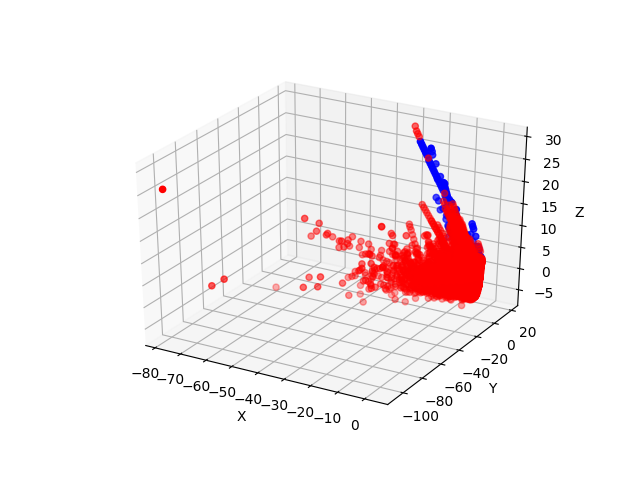

In [5]:
%matplot plt

将被PCA转化过的特征项存入hive中。

In [6]:
df=df.drop("features")
df.write.saveAsTable("user_erin.creditcard_prediction", format="orc", mode="overwrite")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
spark.stop()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…